In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

file_path = "housing.csv"
df = pd.read_csv(file_path)

In [4]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [6]:
df.isnull()

,RM,LSTAT,PTRATIO,MEDV
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
484,False,False,False,False
485,False,False,False,False
486,False,False,False,False
487,False,False,False,False


In [7]:
# Handle or summarize missing values
print(df.isnull().sum())
df = df.dropna()  # or use df.fillna(method='ffill') if appropriate

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64


In [10]:
# Define features and target correctly
X = df.drop('MEDV', axis=1)  # 'MEDV' is the target column in your dataset
y = df['MEDV']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

print("Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Model Performance:
MAE: 64277.28865670337
MSE: 6789025559.26589
RMSE: 82395.54332162565
R² Score: 0.6910934003098511


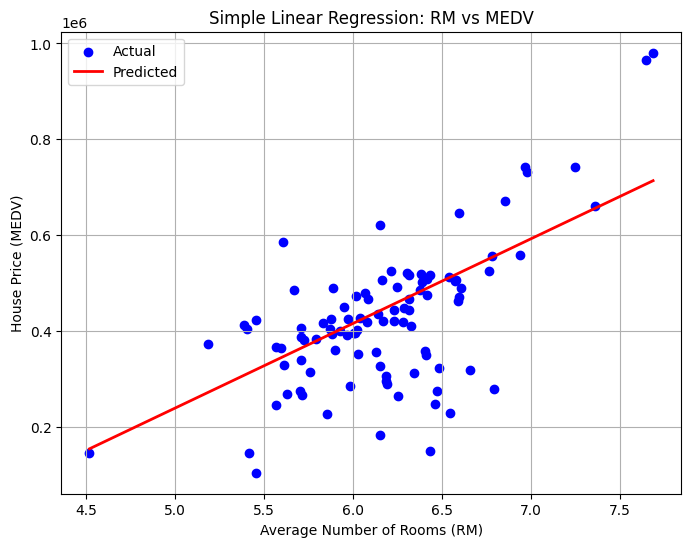

In [13]:
# Use only one feature (e.g., RM) for simple linear regression
X = df[['RM']]  # Independent variable
y = df['MEDV']  # Dependent variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Sort values for a clean straight line
sorted_idx = X_test['RM'].argsort()
X_sorted = X_test.iloc[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')  # Dots
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Predicted')  # Straight line
plt.title("Simple Linear Regression: RM vs MEDV")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("House Price (MEDV)")
plt.legend()
plt.grid(True)
plt.show()